In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import (datasets, naive_bayes, neighbors, neural_network, model_selection)

In [2]:
filename = "C:\\Users\\jakes\\x_train.txt"
S_in = np.loadtxt(filename, delimiter=',')
temp = S_in

filename = "C:\\Users\\jakes\\y_train.txt"
S_inY = np.loadtxt(filename, delimiter=',')
tempY = S_inY

In [3]:
filename = "C:\\Users\\jakes\\S_val.txt"
S_val = np.loadtxt(filename, delimiter=',')
tempV = S_val

filename = "C:\\Users\\jakes\\S_valY.txt"
S_valY = np.loadtxt(filename, delimiter=',')
tempVY = S_valY

### Normalizing

In [4]:
[N,dim]=np.shape(S_in)

S_in = temp
S_inY = tempY

S_val = tempV
S_valY = tempVY

for i in range(dim):
    mean = np.mean(S_in[:,i])
    S_in[:,i] = S_in[:,i] - mean
    
    std = np.std(S_in[:,i])
    S_in[:,i] = S_in[:,i] / std

    S_val[:,i] = S_val[:,i] - mean
    S_val[:,i] = S_val[:,i] / std

## First CNN Model - finding the best lambda

In [5]:
#Reshaping data

S_trainR = S_in
S_valR = S_val

S_trainR = np.reshape(S_in, (len(S_in), 32,32,3))
S_valR = np.reshape(S_val, (len(S_val), 32,32,3))

### Using lambda = 1e-4

In [6]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-4)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-4)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-4)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-4)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-4)),
    tf.keras.layers.Dense(10),
])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1.fit(S_trainR, S_inY, epochs=10,
                   validation_data=(S_valR, S_valY))

Epoch 1/10
1563/1563 [==============================] - 42s 24ms/step - loss: 1.7371 - accuracy: 0.4830 - val_loss: 1.3769 - val_accuracy: 0.6165
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.3370 - accuracy: 0.6305 - val_loss: 1.1959 - val_accuracy: 0.6877
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1936 - accuracy: 0.6837 - val_loss: 1.0890 - val_accuracy: 0.7229
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1196 - accuracy: 0.7133 - val_loss: 1.0449 - val_accuracy: 0.7398
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0637 - accuracy: 0.7350 - val_loss: 0.9624 - val_accuracy: 0.7711
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0186 - accuracy: 0.7525 - val_loss: 0.9222 - val_accuracy: 0.7878
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9863 - accuracy: 0.7653 - val_loss: 0.8875 -

In [7]:
model1acc = history.history['accuracy']
model1valAcc = history.history['val_accuracy']
model1valLoss = history.history['val_loss']

### Using lambda = 1e-3

In [8]:
model1a = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-3)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-3)),
    tf.keras.layers.Dense(10),
])

model1a.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1a.fit(S_trainR, S_inY, epochs=10,
                   validation_data=(S_valR, S_valY))

Epoch 1/10
1563/1563 [==============================] - 39s 24ms/step - loss: 2.3817 - accuracy: 0.3487 - val_loss: 1.8802 - val_accuracy: 0.4134
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.7911 - accuracy: 0.4484 - val_loss: 1.6758 - val_accuracy: 0.5008
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.6683 - accuracy: 0.4948 - val_loss: 1.5772 - val_accuracy: 0.5327
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.6065 - accuracy: 0.5144 - val_loss: 1.5281 - val_accuracy: 0.5482
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5623 - accuracy: 0.5307 - val_loss: 1.5337 - val_accuracy: 0.5388
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5274 - accuracy: 0.5422 - val_loss: 1.5010 - val_accuracy: 0.5577
Epoch 7/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.5026 - accuracy: 0.5527 - val_loss: 1.4455 -

In [9]:
model1aacc = history.history['accuracy']
model1avalAcc = history.history['val_accuracy']
model1avalLoss = history.history['val_loss']

### Using lambda = 1e-2

In [10]:
model1b = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-2)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-2)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-2)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-2)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-2)),
    tf.keras.layers.Dense(10),
])

model1b.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1b.fit(S_trainR, S_inY, epochs=10,
                   validation_data=(S_valR, S_valY))

Epoch 1/10
1563/1563 [==============================] - 40s 24ms/step - loss: 3.9448 - accuracy: 0.0984 - val_loss: 2.5092 - val_accuracy: 0.1033
Epoch 2/10
1563/1563 [==============================] - 35s 22ms/step - loss: 2.5097 - accuracy: 0.0955 - val_loss: 2.5106 - val_accuracy: 0.0962
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 2.5097 - accuracy: 0.0968 - val_loss: 2.5092 - val_accuracy: 0.1031
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 2.5096 - accuracy: 0.1016 - val_loss: 2.5102 - val_accuracy: 0.1022
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 2.5097 - accuracy: 0.0968 - val_loss: 2.5099 - val_accuracy: 0.1022
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 2.5096 - accuracy: 0.0980 - val_loss: 2.5103 - val_accuracy: 0.1033
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 2.5096 - accuracy: 0.0978 - val_loss: 2.5090 -

In [11]:
model1bacc = history.history['accuracy']
model1bvalAcc = history.history['val_accuracy']
model1bvalLoss = history.history['val_loss']

### Using lambda = 1e-5

In [12]:
model1c = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-2)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-5)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-5)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-5)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-5)),
    tf.keras.layers.Dense(10),
])

model1c.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1c.fit(S_trainR, S_inY, epochs=10,
                   validation_data=(S_valR, S_valY))

Epoch 1/10
1563/1563 [==============================] - 39s 24ms/step - loss: 1.6752 - accuracy: 0.4562 - val_loss: 1.3202 - val_accuracy: 0.5733
Epoch 2/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.2612 - accuracy: 0.5966 - val_loss: 1.0813 - val_accuracy: 0.6658
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1031 - accuracy: 0.6549 - val_loss: 1.0741 - val_accuracy: 0.6720
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0037 - accuracy: 0.6929 - val_loss: 0.9064 - val_accuracy: 0.7200
Epoch 5/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.9212 - accuracy: 0.7215 - val_loss: 0.8607 - val_accuracy: 0.7455
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8585 - accuracy: 0.7449 - val_loss: 0.7648 - val_accuracy: 0.7810
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8052 - accuracy: 0.7654 - val_loss: 0.7218 -

In [13]:
model1cacc = history.history['accuracy']
model1cvalAcc = history.history['val_accuracy']
model1cvalLoss = history.history['val_loss']

### Using lambda = 1e-1

In [14]:
model1d = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-1)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-1)),
    tf.keras.layers.Dense(10),
])

model1d.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1d.fit(S_trainR, S_inY, epochs=10,
                   validation_data=(S_valR, S_valY))

Epoch 1/10
1563/1563 [==============================] - 40s 24ms/step - loss: 18.5173 - accuracy: 0.0971 - val_loss: 4.3654 - val_accuracy: 0.0962
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 4.3698 - accuracy: 0.0965 - val_loss: 4.3786 - val_accuracy: 0.1022
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 4.3697 - accuracy: 0.0959 - val_loss: 4.3608 - val_accuracy: 0.0998
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 4.3696 - accuracy: 0.0989 - val_loss: 4.3803 - val_accuracy: 0.0975
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 4.3696 - accuracy: 0.0980 - val_loss: 4.3718 - val_accuracy: 0.0998
Epoch 6/10
1563/1563 [==============================] - 37s 23ms/step - loss: 4.3695 - accuracy: 0.0990 - val_loss: 4.3793 - val_accuracy: 0.0975
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 4.3694 - accuracy: 0.0994 - val_loss: 4.3506 

In [15]:
model1dacc = history.history['accuracy']
model1dvalAcc = history.history['val_accuracy']
model1dvalLoss = history.history['val_loss']

### Using lamda = 1e-6

In [16]:
model1e = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-6)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-6)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-6)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-6)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-6)),
    tf.keras.layers.Dense(10),
])

model1e.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1e.fit(S_trainR, S_inY, epochs=20,
                   validation_data=(S_valR, S_valY))

Epoch 1/20
1563/1563 [==============================] - 39s 23ms/step - loss: 1.4374 - accuracy: 0.4818 - val_loss: 1.0604 - val_accuracy: 0.6312
Epoch 2/20
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0359 - accuracy: 0.6367 - val_loss: 0.8702 - val_accuracy: 0.6990
Epoch 3/20
1563/1563 [==============================] - 37s 23ms/step - loss: 0.8614 - accuracy: 0.7014 - val_loss: 0.7511 - val_accuracy: 0.7409
Epoch 4/20
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7509 - accuracy: 0.7399 - val_loss: 0.6272 - val_accuracy: 0.7801
Epoch 5/20
1563/1563 [==============================] - 37s 24ms/step - loss: 0.6555 - accuracy: 0.7735 - val_loss: 0.5551 - val_accuracy: 0.8120
Epoch 6/20
1563/1563 [==============================] - 37s 24ms/step - loss: 0.5848 - accuracy: 0.7983 - val_loss: 0.4802 - val_accuracy: 0.8329
Epoch 7/20
1563/1563 [==============================] - 37s 24ms/step - loss: 0.5194 - accuracy: 0.8211 - val_loss: 0.4201 -

In [17]:
model1eacc = history.history['accuracy']
model1evalAcc = history.history['val_accuracy']
model1evalLoss = history.history['val_loss']

### Using lamda = 1e-7

In [18]:
model1f = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-7)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-7)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-7)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-7)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-7)),
    tf.keras.layers.Dense(10),
])

model1f.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1f.fit(S_trainR, S_inY, epochs=20,
                   validation_data=(S_valR, S_valY))

Epoch 1/20
1563/1563 [==============================] - 39s 24ms/step - loss: 1.4166 - accuracy: 0.4827 - val_loss: 1.1088 - val_accuracy: 0.6112
Epoch 2/20
1563/1563 [==============================] - 37s 23ms/step - loss: 1.0088 - accuracy: 0.6478 - val_loss: 0.8276 - val_accuracy: 0.7102
Epoch 3/20
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8316 - accuracy: 0.7109 - val_loss: 0.6861 - val_accuracy: 0.7611
Epoch 4/20
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7143 - accuracy: 0.7507 - val_loss: 0.6393 - val_accuracy: 0.7804
Epoch 5/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6343 - accuracy: 0.7797 - val_loss: 0.5138 - val_accuracy: 0.8250
Epoch 6/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5607 - accuracy: 0.8044 - val_loss: 0.4838 - val_accuracy: 0.8315
Epoch 7/20
1563/1563 [==============================] - 37s 23ms/step - loss: 0.4968 - accuracy: 0.8259 - val_loss: 0.4081 -

In [19]:
model1facc = history.history['accuracy']
model1fvalAcc = history.history['val_accuracy']
model1fvalLoss = history.history['val_loss']

### Using lamda = 1e-8

In [20]:
model1g = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-8)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-8)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-8)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-7)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-7)),
    tf.keras.layers.Dense(10),
])

model1g.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1g.fit(S_trainR, S_inY, epochs=20,
                   validation_data=(S_valR, S_valY))

Epoch 1/20
1563/1563 [==============================] - 41s 24ms/step - loss: 1.3910 - accuracy: 0.4962 - val_loss: 1.0611 - val_accuracy: 0.6244
Epoch 2/20
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0017 - accuracy: 0.6482 - val_loss: 0.8374 - val_accuracy: 0.7030
Epoch 3/20
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8283 - accuracy: 0.7121 - val_loss: 0.6598 - val_accuracy: 0.7676
Epoch 4/20
1563/1563 [==============================] - 37s 23ms/step - loss: 0.7155 - accuracy: 0.7514 - val_loss: 0.6220 - val_accuracy: 0.7799
Epoch 5/20
1563/1563 [==============================] - 37s 24ms/step - loss: 0.6292 - accuracy: 0.7805 - val_loss: 0.5208 - val_accuracy: 0.8163
Epoch 6/20
1563/1563 [==============================] - 37s 23ms/step - loss: 0.5612 - accuracy: 0.8046 - val_loss: 0.4699 - val_accuracy: 0.8355
Epoch 7/20
1563/1563 [==============================] - 37s 24ms/step - loss: 0.4994 - accuracy: 0.8260 - val_loss: 0.4095 -

In [21]:
model1gacc = history.history['accuracy']
model1gvalAcc = history.history['val_accuracy']
model1gvalLoss = history.history['val_loss']

### Using lamda = 1e-9

In [22]:
model1h = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-9)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-9)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-9)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-9)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-9)),
    tf.keras.layers.Dense(10),
])

model1h.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1h.fit(S_trainR, S_inY, epochs=20,
                   validation_data=(S_valR, S_valY))

Epoch 1/20
1563/1563 [==============================] - 39s 24ms/step - loss: 1.3828 - accuracy: 0.4984 - val_loss: 1.0678 - val_accuracy: 0.6252
Epoch 2/20
1563/1563 [==============================] - 37s 23ms/step - loss: 0.9837 - accuracy: 0.6568 - val_loss: 0.8085 - val_accuracy: 0.7151
Epoch 3/20
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8202 - accuracy: 0.7140 - val_loss: 0.6666 - val_accuracy: 0.7734
Epoch 4/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7149 - accuracy: 0.7518 - val_loss: 0.6079 - val_accuracy: 0.7871
Epoch 5/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6373 - accuracy: 0.7779 - val_loss: 0.5568 - val_accuracy: 0.8019
Epoch 6/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5675 - accuracy: 0.8013 - val_loss: 0.5091 - val_accuracy: 0.8206
Epoch 7/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5087 - accuracy: 0.8203 - val_loss: 0.4294 -

In [23]:
model1hacc = history.history['accuracy']
model1hvalAcc = history.history['val_accuracy']
model1hvalLoss = history.history['val_loss']

### Using lamda = 1e-10

In [24]:
model1i = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-10)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-10)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-10)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-10)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-10)),
    tf.keras.layers.Dense(10),
])

model1i.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1i.fit(S_trainR, S_inY, epochs=20,
                   validation_data=(S_valR, S_valY))

model1i.save('CNN_Model')

Epoch 1/20
1563/1563 [==============================] - 41s 25ms/step - loss: 1.4109 - accuracy: 0.4892 - val_loss: 1.1138 - val_accuracy: 0.6082
Epoch 2/20
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0033 - accuracy: 0.6466 - val_loss: 0.8748 - val_accuracy: 0.6930
Epoch 3/20
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8315 - accuracy: 0.7080 - val_loss: 0.7162 - val_accuracy: 0.7481
Epoch 4/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7216 - accuracy: 0.7492 - val_loss: 0.6196 - val_accuracy: 0.7808
Epoch 5/20
1563/1563 [==============================] - 37s 23ms/step - loss: 0.6332 - accuracy: 0.7804 - val_loss: 0.5153 - val_accuracy: 0.8186
Epoch 6/20
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5630 - accuracy: 0.8016 - val_loss: 0.5239 - val_accuracy: 0.8123
Epoch 7/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.5033 - accuracy: 0.8229 - val_loss: 0.3930 -

INFO:tensorflow:Assets written to: CNN_Model\assets


INFO:tensorflow:Assets written to: CNN_Model\assets


In [26]:
model1iacc = history.history['accuracy']
model1ivalAcc = history.history['val_accuracy']
model1ivalLoss = history.history['val_loss']

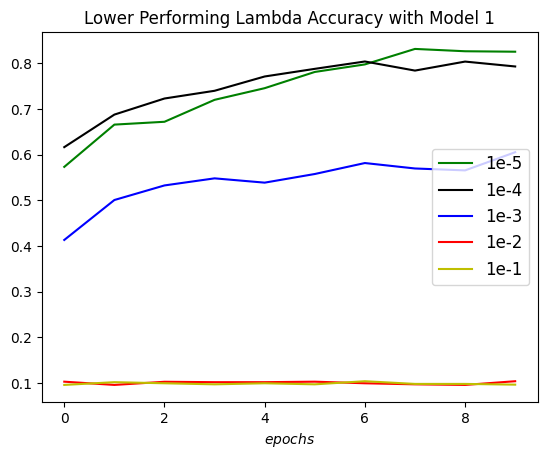

In [27]:
f, ax=plt.subplots()
ax.title.set_text("Lower Performing Lambda Accuracy with Model 1")
ax.plot(model1cvalAcc, label="1e-5", color='g')
ax.plot(model1valAcc, label="1e-4", color='k')
ax.plot(model1avalAcc, label="1e-3", color='b')
ax.plot(model1bvalAcc, label="1e-2", color='r')
ax.plot(model1dvalAcc, label="1e-1", color='y')
ax.set_xlabel("$epochs$")
ax.legend(fontsize=12)

Max mean accuracy is 0.8401819974184036 from model 2


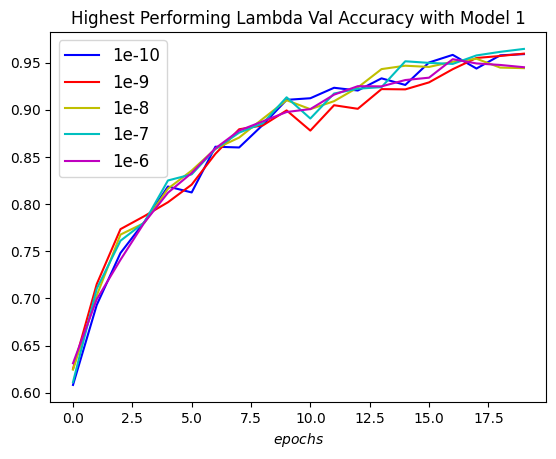

In [30]:
means = [np.mean(model1eacc), np.mean(model1facc), np.mean(model1gacc), np.mean(model1hacc), np.mean(model1iacc)]

f, ax=plt.subplots()
ax.title.set_text("Highest Performing Lambda Val Accuracy with Model 1")
ax.plot(model1ivalAcc, label="1e-10", color='b')
ax.plot(model1hvalAcc, label="1e-9", color='r')
ax.plot(model1gvalAcc, label="1e-8", color='y')
ax.plot(model1fvalAcc, label="1e-7", color='c')
ax.plot(model1evalAcc, label="1e-6", color='m')
ax.set_xlabel("$epochs$")
ax.legend(fontsize=12)


print("Max mean accuracy is",max(means),"from model", means.index(max(means)))

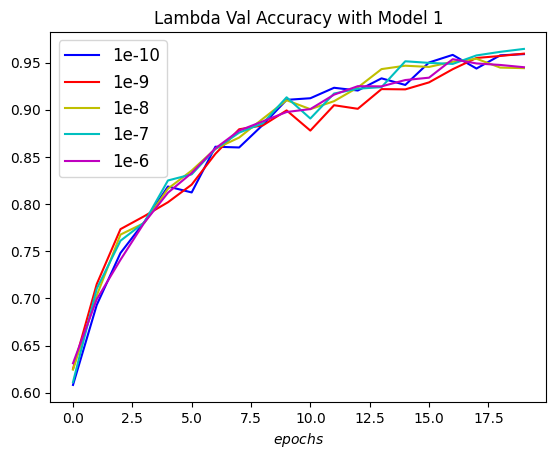

In [29]:
f, ax=plt.subplots()
ax.title.set_text("Lambda Val Accuracy with Model 1")
ax.plot(model1ivalAcc, label="1e-10", color='b')
ax.plot(model1hvalAcc, label="1e-9", color='r')
ax.plot(model1gvalAcc, label="1e-8", color='y')
ax.plot(model1fvalAcc, label="1e-7", color='c')
ax.plot(model1evalAcc, label="1e-6", color='m')
ax.set_xlabel("$epochs$")
ax.legend(fontsize=12)